In [1]:
#new
# use RESIDENTIAL ENERGY CONSUMPTION SURVEY (RECS) from 2009 as the 2015 version lacks 
#consumption and expenditure data.

Introduction 

1)(fact check)Residential energy consumption accounts for 40% of annual US energy consumption
2) (reword) benefits of understanding the data include a) allow homeowners to make more informed decisions to lower their energy bills b)help utilities maximize efficiency/incentive programs, c) allow governments or NGOs to better forecast energy demand and address climate concerns.



In [2]:
!ls residential-energy-consumption-survey

public_layout.csv             recs2009_public_codebook.xlsx
recs2009_public.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# 1. Get the data

#### Import the Layout file 
Layout consists a description of each label name in the RECS dataset

In [4]:
layout = pd.read_csv('./residential-energy-consumption-survey/public_layout.csv')

In [5]:
!ls residential-energy-consumption-survey

public_layout.csv             recs2009_public_codebook.xlsx
recs2009_public.csv


In [6]:
#look at the layout of the RECS file 
layout

,Variable Name,Variable Label,Variable Order in File,Variable Type,Length
0,DOEID,Unique identifier for each respondent,1,Character,5
1,REGIONC,Census Region,2,Numeric,8
2,DIVISION,Census Division,3,Numeric,8
3,REPORTABLE_DOMAIN,Reportable states and groups of states,4,Numeric,8
4,TYPEHUQ,Type of housing unit,5,Numeric,8
5,NWEIGHT,Final sample weight,6,Numeric,8
6,HDD65,"Heating degree days in 2009, base temperature 65F",7,Numeric,8
7,CDD65,"Cooling degree days in 2009, base temperature 65F",8,Numeric,8
8,HDD30YR,"Heating degree days, 30-year average 1981-2010...",9,Numeric,8
9,CDD30YR,"Cooling degree days, 30-year average 1981-2010...",10,Numeric,8


In [217]:
# use to pull out groupings of variable names

parse = layout[layout['Variable Label'].str.contains('AGEHHMEMCAT')]
parse

,Variable Name,Variable Label,Variable Order in File,Variable Type,Length
799,ZAGEHHMEMCAT2,Imputation flag for AGEHHMEMCAT2,800,Numeric,8
800,ZAGEHHMEMCAT3,Imputation flag for AGEHHMEMCAT3,801,Numeric,8
801,ZAGEHHMEMCAT4,Imputation flag for AGEHHMEMCAT4,802,Numeric,8
802,ZAGEHHMEMCAT5,Imputation flag for AGEHHMEMCAT5,803,Numeric,8
803,ZAGEHHMEMCAT6,Imputation flag for AGEHHMEMCAT6,804,Numeric,8
804,ZAGEHHMEMCAT7,Imputation flag for AGEHHMEMCAT7,805,Numeric,8
805,ZAGEHHMEMCAT8,Imputation flag for AGEHHMEMCAT8,806,Numeric,8
806,ZAGEHHMEMCAT9,Imputation flag for AGEHHMEMCAT9,807,Numeric,8
807,ZAGEHHMEMCAT10,Imputation flag for AGEHHMEMCAT10,808,Numeric,8
808,ZAGEHHMEMCAT11,Imputation flag for AGEHHMEMCAT11,809,Numeric,8


In [8]:
parse.iloc[:,:2].values

array([['ZKOWNRENT', 'Imputation flag for KOWNRENT'],
       ['ZCONDCOOP', 'Imputation flag for CONDCOOP'],
       ['ZYEARMADE', 'Imputation flag for YEARMADE'],
       ['ZYEARMADERANGE', 'Imputation flag for YEARMADERANGE'],
       ['ZOCCUPYYRANGE', 'Imputation flag for OCCUPYYRANGE'],
       ['ZCONVERSION', 'Imputation flag for CONVERSION'],
       ['ZORIG1FAM', 'Imputation flag for ORIG1FAM'],
       ['ZLOOKLIKE', 'Imputation flag for LOOKLIKE'],
       ['ZNUMFLRS', 'Imputation flag for NUMFLRS'],
       ['ZNUMAPTS', 'Imputation flag for NUMAPTS'],
       ['ZWALLTYPE', 'Imputation flag for WALLTYPE'],
       ['ZROOFTYPE', 'Imputation flag for ROOFTYPE'],
       ['ZSTUDIO', 'Imputation flag for STUDIO'],
       ['ZNAPTFLRS', 'Imputation flag for NAPTFLRS'],
       ['ZSTORIES', 'Imputation flag for STORIES'],
       ['ZTYPEHUQ4', 'Imputation flag for TYPEHUQ4'],
       ['ZBEDROOMS', 'Imputation flag for BEDROOMS'],
       ['ZNCOMBATH', 'Imputation flag for NCOMBATH'],
       ['ZNHAFBA

In [9]:
parse.iloc[:,:1].values

array([['ZKOWNRENT'],
       ['ZCONDCOOP'],
       ['ZYEARMADE'],
       ['ZYEARMADERANGE'],
       ['ZOCCUPYYRANGE'],
       ['ZCONVERSION'],
       ['ZORIG1FAM'],
       ['ZLOOKLIKE'],
       ['ZNUMFLRS'],
       ['ZNUMAPTS'],
       ['ZWALLTYPE'],
       ['ZROOFTYPE'],
       ['ZSTUDIO'],
       ['ZNAPTFLRS'],
       ['ZSTORIES'],
       ['ZTYPEHUQ4'],
       ['ZBEDROOMS'],
       ['ZNCOMBATH'],
       ['ZNHAFBATH'],
       ['ZOTHROOMS'],
       ['ZCELLAR'],
       ['ZCRAWL'],
       ['ZCONCRETE'],
       ['ZBASEFIN'],
       ['ZFINBASERMS'],
       ['ZBASEHEAT'],
       ['ZBASEHT2'],
       ['ZPCTBSTHT'],
       ['ZBASECOOL'],
       ['ZBASECL2'],
       ['ZPCTBSTCL'],
       ['ZBASEUSE'],
       ['ZATTIC'],
       ['ZATTICFIN'],
       ['ZFINATTRMS'],
       ['ZATTCHEAT'],
       ['ZATTCHT2'],
       ['ZPCTATTHT'],
       ['ZATTCCOOL'],
       ['ZPCTATTCL'],
       ['ZATTCCL2'],
       ['ZATTICUSE'],
       ['ZPRKGPLC1'],
       ['ZSIZEOFGARAGE'],
       ['ZGARGLOC'],
       ['ZGA

#### Import the Codebook file

Codebook describes how responses are coded in the RECS survey and in the RECS dataset

In [10]:
codebook = pd.read_excel('./residential-energy-consumption-survey/recs2009_public_codebook.xlsx')

In [11]:
codebook.head()

,2009 RECS Variable and Response Codebook,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Variable Name,Variable Description,Response Codes and Labels,NaN,Variables in End-Use Models (see note at bottom),NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,Electricity,Natural Gas,Propane,Fuel Oil,Kerosene
2,DOEID,Unique identifier for each respondent,00001 - 12083,Unique identifier for each respondent,NaN,NaN,NaN,NaN,NaN
3,REGIONC,Census Region,1\n2\n3\n4,Northeast Census Region\nMidwest Census Region...,NaN,NaN,NaN,NaN,NaN
4,DIVISION,Census Division,1\n2\n3\n4\n5\n6\n7\n8\n9\n10,"New England Census Division (CT, MA, ME, NH, R...",NaN,NaN,NaN,NaN,NaN


In [404]:
# look at columns of codebook based on feature name

review_cb = codebook[codebook['2009 RECS Variable and Response Codebook'].str.contains("MONEYPY")==True]
pd.set_option('display.max_colwidth', -1)
review_cb.transpose()

,787,825
2009 RECS Variable and Response Codebook,MONEYPY,ZMONEYPY
Unnamed: 1,2009 gross household income,Imputation flag for MONEYPY
Unnamed: 2,1\n2\n3\n4\n5\n6\n7\n8\n9\n10\n11\n12\n13\n14\n15\n16\n17\n18\n19\n20\n21\n22\n23\n24,0\n1
Unnamed: 3,"Less than $2,500\n$2,500 to $4,999\n$5,000 to $7,499\n$7,500 to $9,999\n$10,000 to $14,999\n$15,000 to $19,999\n$20,000 to $24,999\n$25,000 to $29,999\n$30,000 to $34,999\n$35,000 to $39,999\n$40,000 to $44,999\n$45,000 to $49,999\n$50,000 to $54,999\n$55,000 to $59,999\n$60,000 to $64,999\n$65,000 to $69,999\n$70,000 to $74,999\n$75,000 to $79,999\n$80,000 to $84,999\n$85,000 to $89,999\n$90,000 to $94,999\n$95,000 to $99,999\n$100,000 to $119,999\n$120,000 or More",Not Imputed\nImputed
Unnamed: 4,NaN,NaN
Unnamed: 5,OTH_A,NaN
Unnamed: 6,NaN,NaN
Unnamed: 7,NaN,NaN
Unnamed: 8,NaN,NaN


#### Import the RECS dataset

In [294]:
RECS = pd.read_csv('./residential-energy-consumption-survey/recs2009_public.csv')

In [295]:
# look at the shape of RECS; look at the first five observations
print RECS.shape

RECS.head()

(12083, 931)


,DOEID,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,...,SCALEEL,KAVALNG,PERIODNG,SCALENG,PERIODLP,SCALELP,PERIODFO,SCALEFO,PERIODKR,SCALEKER
0,1,2,4,12,2,2471.679705,4742,1080,4953,1271,...,0,-2,-2,-2,-2,-2,-2,-2,-2,-2
1,2,4,10,26,2,8599.172010,2662,199,2688,143,...,0,1,1,0,-2,-2,-2,-2,-2,-2
2,3,1,1,1,5,8969.915921,6233,505,5741,829,...,0,3,5,3,-2,-2,-2,-2,-2,-2
3,4,2,3,7,2,18003.639600,6034,672,5781,868,...,3,3,5,3,-2,-2,-2,-2,-2,-2
4,5,1,1,1,3,5999.605242,5388,702,5313,797,...,0,1,1,0,-2,-2,-2,-2,-2,-2


In [296]:
# Look at the number of each data type
print RECS.dtypes.value_counts()

int64      878
float64    51 
object     2  
dtype: int64


In [297]:
print RECS.columns.values


['DOEID' 'REGIONC' 'DIVISION' 'REPORTABLE_DOMAIN' 'TYPEHUQ' 'NWEIGHT'
 'HDD65' 'CDD65' 'HDD30YR' 'CDD30YR' 'Climate_Region_Pub' 'AIA_Zone'
 'METROMICRO' 'UR' 'KOWNRENT' 'CONDCOOP' 'YEARMADE' 'YEARMADERANGE'
 'OCCUPYYRANGE' 'CONVERSION' 'ORIG1FAM' 'LOOKLIKE' 'NUMFLRS' 'NUMAPTS'
 'WALLTYPE' 'ROOFTYPE' 'STUDIO' 'NAPTFLRS' 'STORIES' 'TYPEHUQ4' 'BEDROOMS'
 'NCOMBATH' 'NHAFBATH' 'OTHROOMS' 'TOTROOMS' 'CELLAR' 'CRAWL' 'CONCRETE'
 'BASEFIN' 'FINBASERMS' 'BASEHEAT' 'BASEHT2' 'PCTBSTHT' 'BASECOOL'
 'BASECL2' 'PCTBSTCL' 'BASEUSE' 'ATTIC' 'ATTICFIN' 'FINATTRMS' 'ATTCHEAT'
 'ATTCHT2' 'PCTATTHT' 'ATTCCOOL' 'ATTCCL2' 'PCTATTCL' 'ATTICUSE' 'PRKGPLC1'
 'SIZEOFGARAGE' 'GARGLOC' 'GARGHEAT' 'GARGCOOL' 'PRKGPLC2' 'SIZEOFDETACH'
 'OUTLET' 'ZKOWNRENT' 'ZCONDCOOP' 'ZYEARMADE' 'ZYEARMADERANGE'
 'ZOCCUPYYRANGE' 'ZCONVERSION' 'ZORIG1FAM' 'ZLOOKLIKE' 'ZNUMFLRS'
 'ZNUMAPTS' 'ZWALLTYPE' 'ZROOFTYPE' 'ZSTUDIO' 'ZNAPTFLRS' 'ZSTORIES'
 'ZTYPEHUQ4' 'ZBEDROOMS' 'ZNCOMBATH' 'ZNHAFBATH' 'ZOTHROOMS' 'ZCELLAR'
 'ZCRAWL' 'ZCO

Understand the survey

The 2009 Residential Energy Consumption Survey (RECS) dataset contains 12,083 household interviews collected between 02/2010-07/2010, comprising of in-person interviews, rental agent surveys, and energy supplier surveys. The approximate timeline of the 2009 RECS process is be 2009-2012. This is the most recent completed cycle of RECS data. (The 2015 RECS dataset does not have consumption and expenditure estimates.)

RECS captures what devices consume energy, how households consume them, and how much energy they consume. It captured actual use in 16 states and produces estimates for group of the remaining states.  


<span style="color:Red">
ideas - plot equipment for all age groups, plot equipment for millenials
AC, computers, 
</span>

# Explore the data

In [17]:
# show all values without cutting any out 
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [18]:
# look at percentage of null values
nulls = pd.DataFrame(zip(RECS.columns,RECS.dtypes,((RECS.isnull().sum())/len(RECS)).values))

print_full(nulls)

                      0        1         2
0                 DOEID    int64  0.000000
1               REGIONC    int64  0.000000
2              DIVISION    int64  0.000000
3     REPORTABLE_DOMAIN    int64  0.000000
4               TYPEHUQ    int64  0.000000
5               NWEIGHT  float64  0.000000
6                 HDD65    int64  0.000000
7                 CDD65    int64  0.000000
8               HDD30YR    int64  0.000000
9               CDD30YR    int64  0.000000
10   Climate_Region_Pub    int64  0.000000
11             AIA_Zone    int64  0.000000
12           METROMICRO   object  0.000000
13                   UR   object  0.000000
14             KOWNRENT    int64  0.000000
15             CONDCOOP    int64  0.000000
16             YEARMADE    int64  0.000000
17        YEARMADERANGE    int64  0.000000
18         OCCUPYYRANGE    int64  0.000000
19           CONVERSION    int64  0.000000
20             ORIG1FAM    int64  0.000000
21             LOOKLIKE    int64  0.000000
22         

In [19]:
# look at object type columns
RECS['UR'].value_counts()

U    9656
R    2427
Name: UR, dtype: int64

In [298]:
RECS.shape

(12083, 931)

## a note about imputation
From the EIA's methodology report for 2015 RECS (assuming this methodology is similar for 2009) - 
The hot-deck imputation method was used for the 2015 RECS. In this method, a recipient case that has a
missing value for the item being imputed is matched with a similar donor case that has a response. The
donor’s value for that item is used to replace the missing value for the recipient case. After imputation,
final editing reviews ensured questionnaire skip patterns were performed correctly.
Implementations of the hot-deck method differ on both how to group recipients and potential donors,
and how to select the donor for a given recipient. The 2015 RECS used the Predictive Mean
Neighborhood (PMN) hot-deck method for household square footage and the Cyclical Tree-Based Hot
Deck (CTB) hot-deck method for the remainder of the household survey variables. The PMN method
uses regression models to group recipients and potential donors, and chooses a donor with a statistical
nearest neighbor approach. The CTB method uses classification trees to group recipients and potential
donors, and uses a weighted sequential hot deck imputation procedure
in which weights are used to
match chosen donors to recipients.

In [300]:
'''
look at the columns where ZTOTSQFT has an imputation flag (denoted by '1') and its corresponding TOTCSQFT value to 
see if I can tell how the columns are imputed. 

''' 
RECS[['TOTCSQFT', 'ZTOTSQFT']].loc[RECS[ 'ZTOTSQFT'] == 1].sample(5)

,TOTCSQFT,ZTOTSQFT
7980,1230,1
10350,3435,1
9328,715,1
11741,2603,1
11284,2581,1


In [21]:
# look at correlations
RECS.corr()

,DOEID,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,...,SCALEEL,KAVALNG,PERIODNG,SCALENG,PERIODLP,SCALELP,PERIODFO,SCALEFO,PERIODKR,SCALEKER
DOEID,1.000000,-0.000372,-0.002316,-0.004707,-0.012120,0.017495,0.004473,-0.013278,0.004489,-0.014123,...,-0.006767,-0.006480,-0.011045,-0.010096,0.021577,0.021065,-0.005155,-0.005218,0.010895,0.010573
REGIONC,-0.000372,1.000000,0.952803,0.969586,-0.056385,-0.005836,-0.587197,0.366785,-0.601890,0.305674,...,-0.053844,-0.059851,-0.083011,-0.090041,-0.024141,-0.022493,-0.351799,-0.345641,-0.058608,-0.058574
DIVISION,-0.002316,0.952803,1.000000,0.979672,-0.025788,-0.049847,-0.563764,0.290634,-0.573126,0.220857,...,-0.028722,0.010847,-0.017788,-0.025417,-0.034541,-0.032424,-0.309016,-0.302892,-0.057203,-0.056881
REPORTABLE_DOMAIN,-0.004707,0.969586,0.979672,1.000000,-0.049255,-0.056551,-0.630987,0.404943,-0.642797,0.341611,...,-0.037278,-0.055204,-0.078408,-0.084712,-0.032007,-0.030143,-0.346314,-0.339886,-0.062871,-0.062646
TYPEHUQ,-0.012120,-0.056385,-0.025788,-0.049255,1.000000,0.002530,-0.035852,-0.018070,-0.036604,-0.016575,...,0.182481,0.127978,0.186935,0.198853,-0.141241,-0.136315,0.063163,0.069229,-0.063826,-0.062676
NWEIGHT,0.017495,-0.005836,-0.049847,-0.056551,0.002530,1.000000,0.043287,-0.050998,0.045482,-0.048034,...,0.074389,-0.023897,-0.013779,-0.012588,0.085569,0.083479,-0.042537,-0.041760,0.007720,0.007065
HDD65,0.004473,-0.587197,-0.563764,-0.630987,-0.035852,0.043287,1.000000,-0.807014,0.990868,-0.757289,...,-0.011214,0.123852,0.110204,0.110195,0.066722,0.064053,0.209029,0.203914,0.065275,0.064932
CDD65,-0.013278,0.366785,0.290634,0.404943,-0.018070,-0.050998,-0.807014,1.000000,-0.806794,0.977719,...,0.031891,-0.223624,-0.194989,-0.192408,-0.033063,-0.031094,-0.177809,-0.173721,-0.054945,-0.054752
HDD30YR,0.004489,-0.601890,-0.573126,-0.642797,-0.036604,0.045482,0.990868,-0.806794,1.000000,-0.770212,...,-0.011210,0.129080,0.114186,0.113874,0.064448,0.061822,0.215145,0.209739,0.065731,0.065458
CDD30YR,-0.014123,0.305674,0.220857,0.341611,-0.016575,-0.048034,-0.757289,0.977719,-0.770212,1.000000,...,0.042360,-0.216101,-0.186412,-0.183720,-0.032959,-0.030926,-0.176436,-0.171962,-0.053667,-0.053595


In [22]:
RECS.describe

<bound method DataFrame.describe of        DOEID  REGIONC  DIVISION  REPORTABLE_DOMAIN  TYPEHUQ       NWEIGHT  \
0          1        2         4                 12        2   2471.679705   
1          2        4        10                 26        2   8599.172010   
2          3        1         1                  1        5   8969.915921   
3          4        2         3                  7        2  18003.639600   
4          5        1         1                  1        3   5999.605242   
5          6        2         4                 10        2   4232.486778   
6          7        1         2                  3        2   7862.341967   
7          8        3         5                 17        2   6297.038285   
8          9        1         2                  5        3  12156.721510   
9         10        2         4                 12        2   3242.224473   
10        11        4        10                 26        4   8812.434127   
11        12        1         2         

## Demographic data 

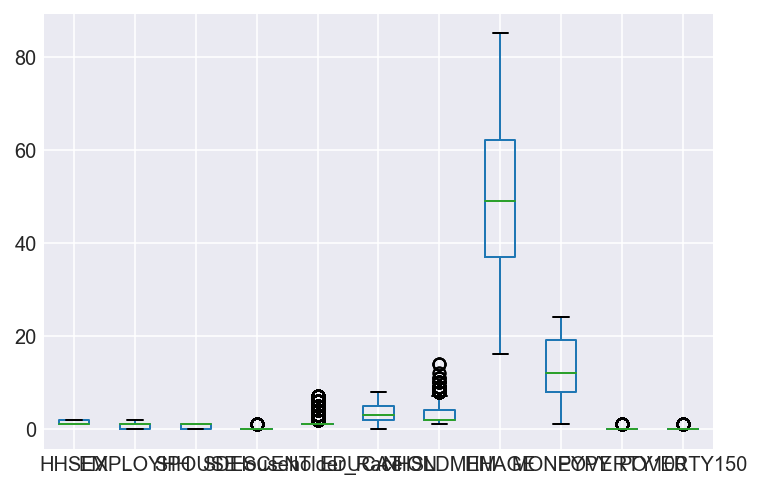

In [24]:
# build some box plots
demographic = RECS[['HHSEX', 'EMPLOYHH', 'SPOUSE', 'SDESCENT', 'Householder_Race', 'EDUCATION', 'NHSLDMEM', 
     'HHAGE', 'MONEYPY', 'POVERTY100', 'POVERTY150']]

demographic.plot(kind='box')

In [261]:
demographic_stand = (demographic -demographic.mean())/demographic.std()
demographic_stand.head()

,HHSEX,EMPLOYHH,SPOUSE,SDESCENT,Householder_Race,EDUCATION,NHSLDMEM,HHAGE,MONEYPY,POVERTY100,POVERTY150
0,-0.942125,0.416833,0.826325,-0.40101,-0.387387,0.955336,0.880376,-0.881552,1.465681,-0.401149,-0.548289
1,-0.942125,0.416833,-1.210078,-0.40101,0.488674,-0.826408,2.199930,-0.582546,-0.591909,-0.401149,1.823704
2,-0.942125,0.416833,-1.210078,-0.40101,-0.387387,1.549250,-1.098955,-0.283540,0.730827,-0.401149,-0.548289
3,-0.942125,-1.129083,-1.210078,-0.40101,-0.387387,-0.826408,-1.098955,1.510497,-0.444938,-0.401149,-0.548289
4,-0.942125,0.416833,-1.210078,-0.40101,-0.387387,0.955336,-1.098955,-0.582546,1.024769,-0.401149,-0.548289


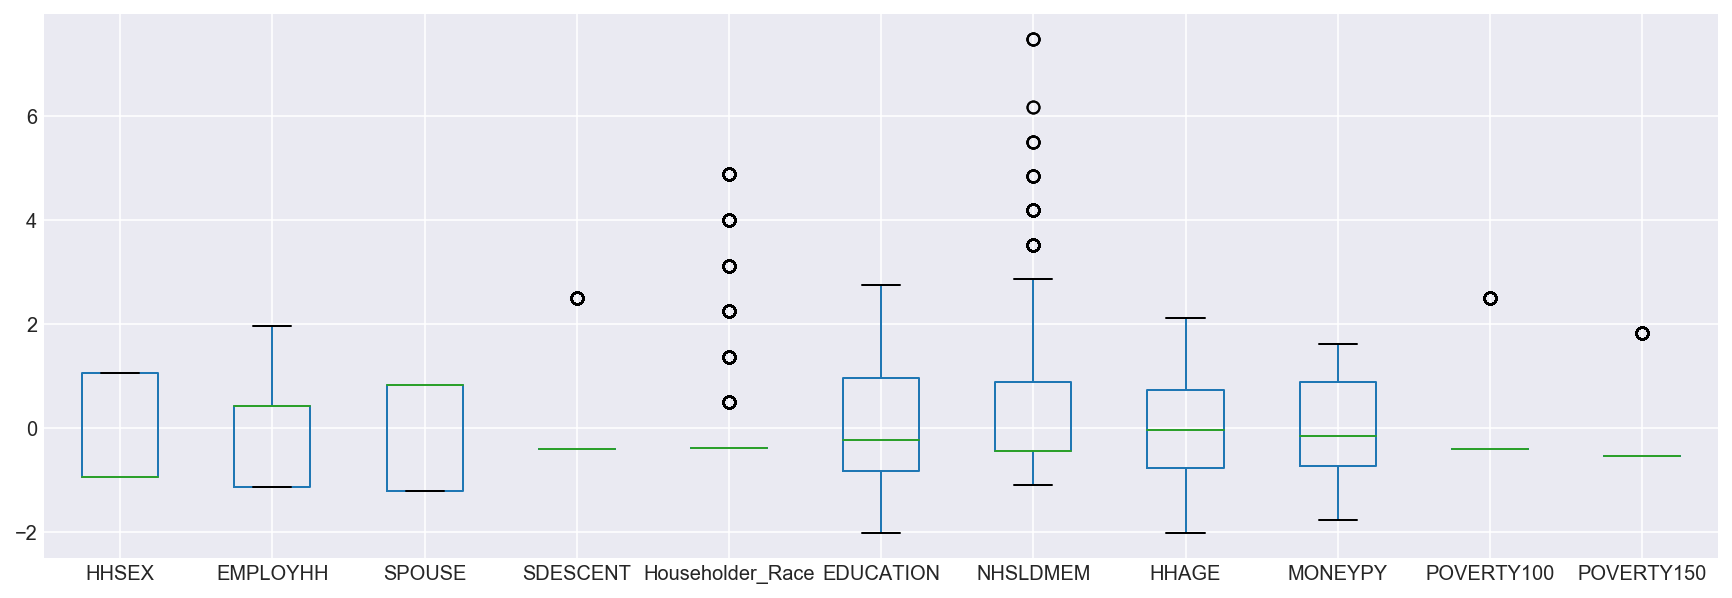

In [26]:
demographic_stand.plot(kind='box',figsize=(15,5))

In [363]:
RECS[['TOTCSQFT', 'ZTOTSQFT']].apply(pd.Series.value_counts).sample(5)


,TOTCSQFT,ZTOTSQFT
183,3.0,NaN
4986,1.0,NaN
2019,1.0,NaN
4141,1.0,NaN
1963,1.0,NaN


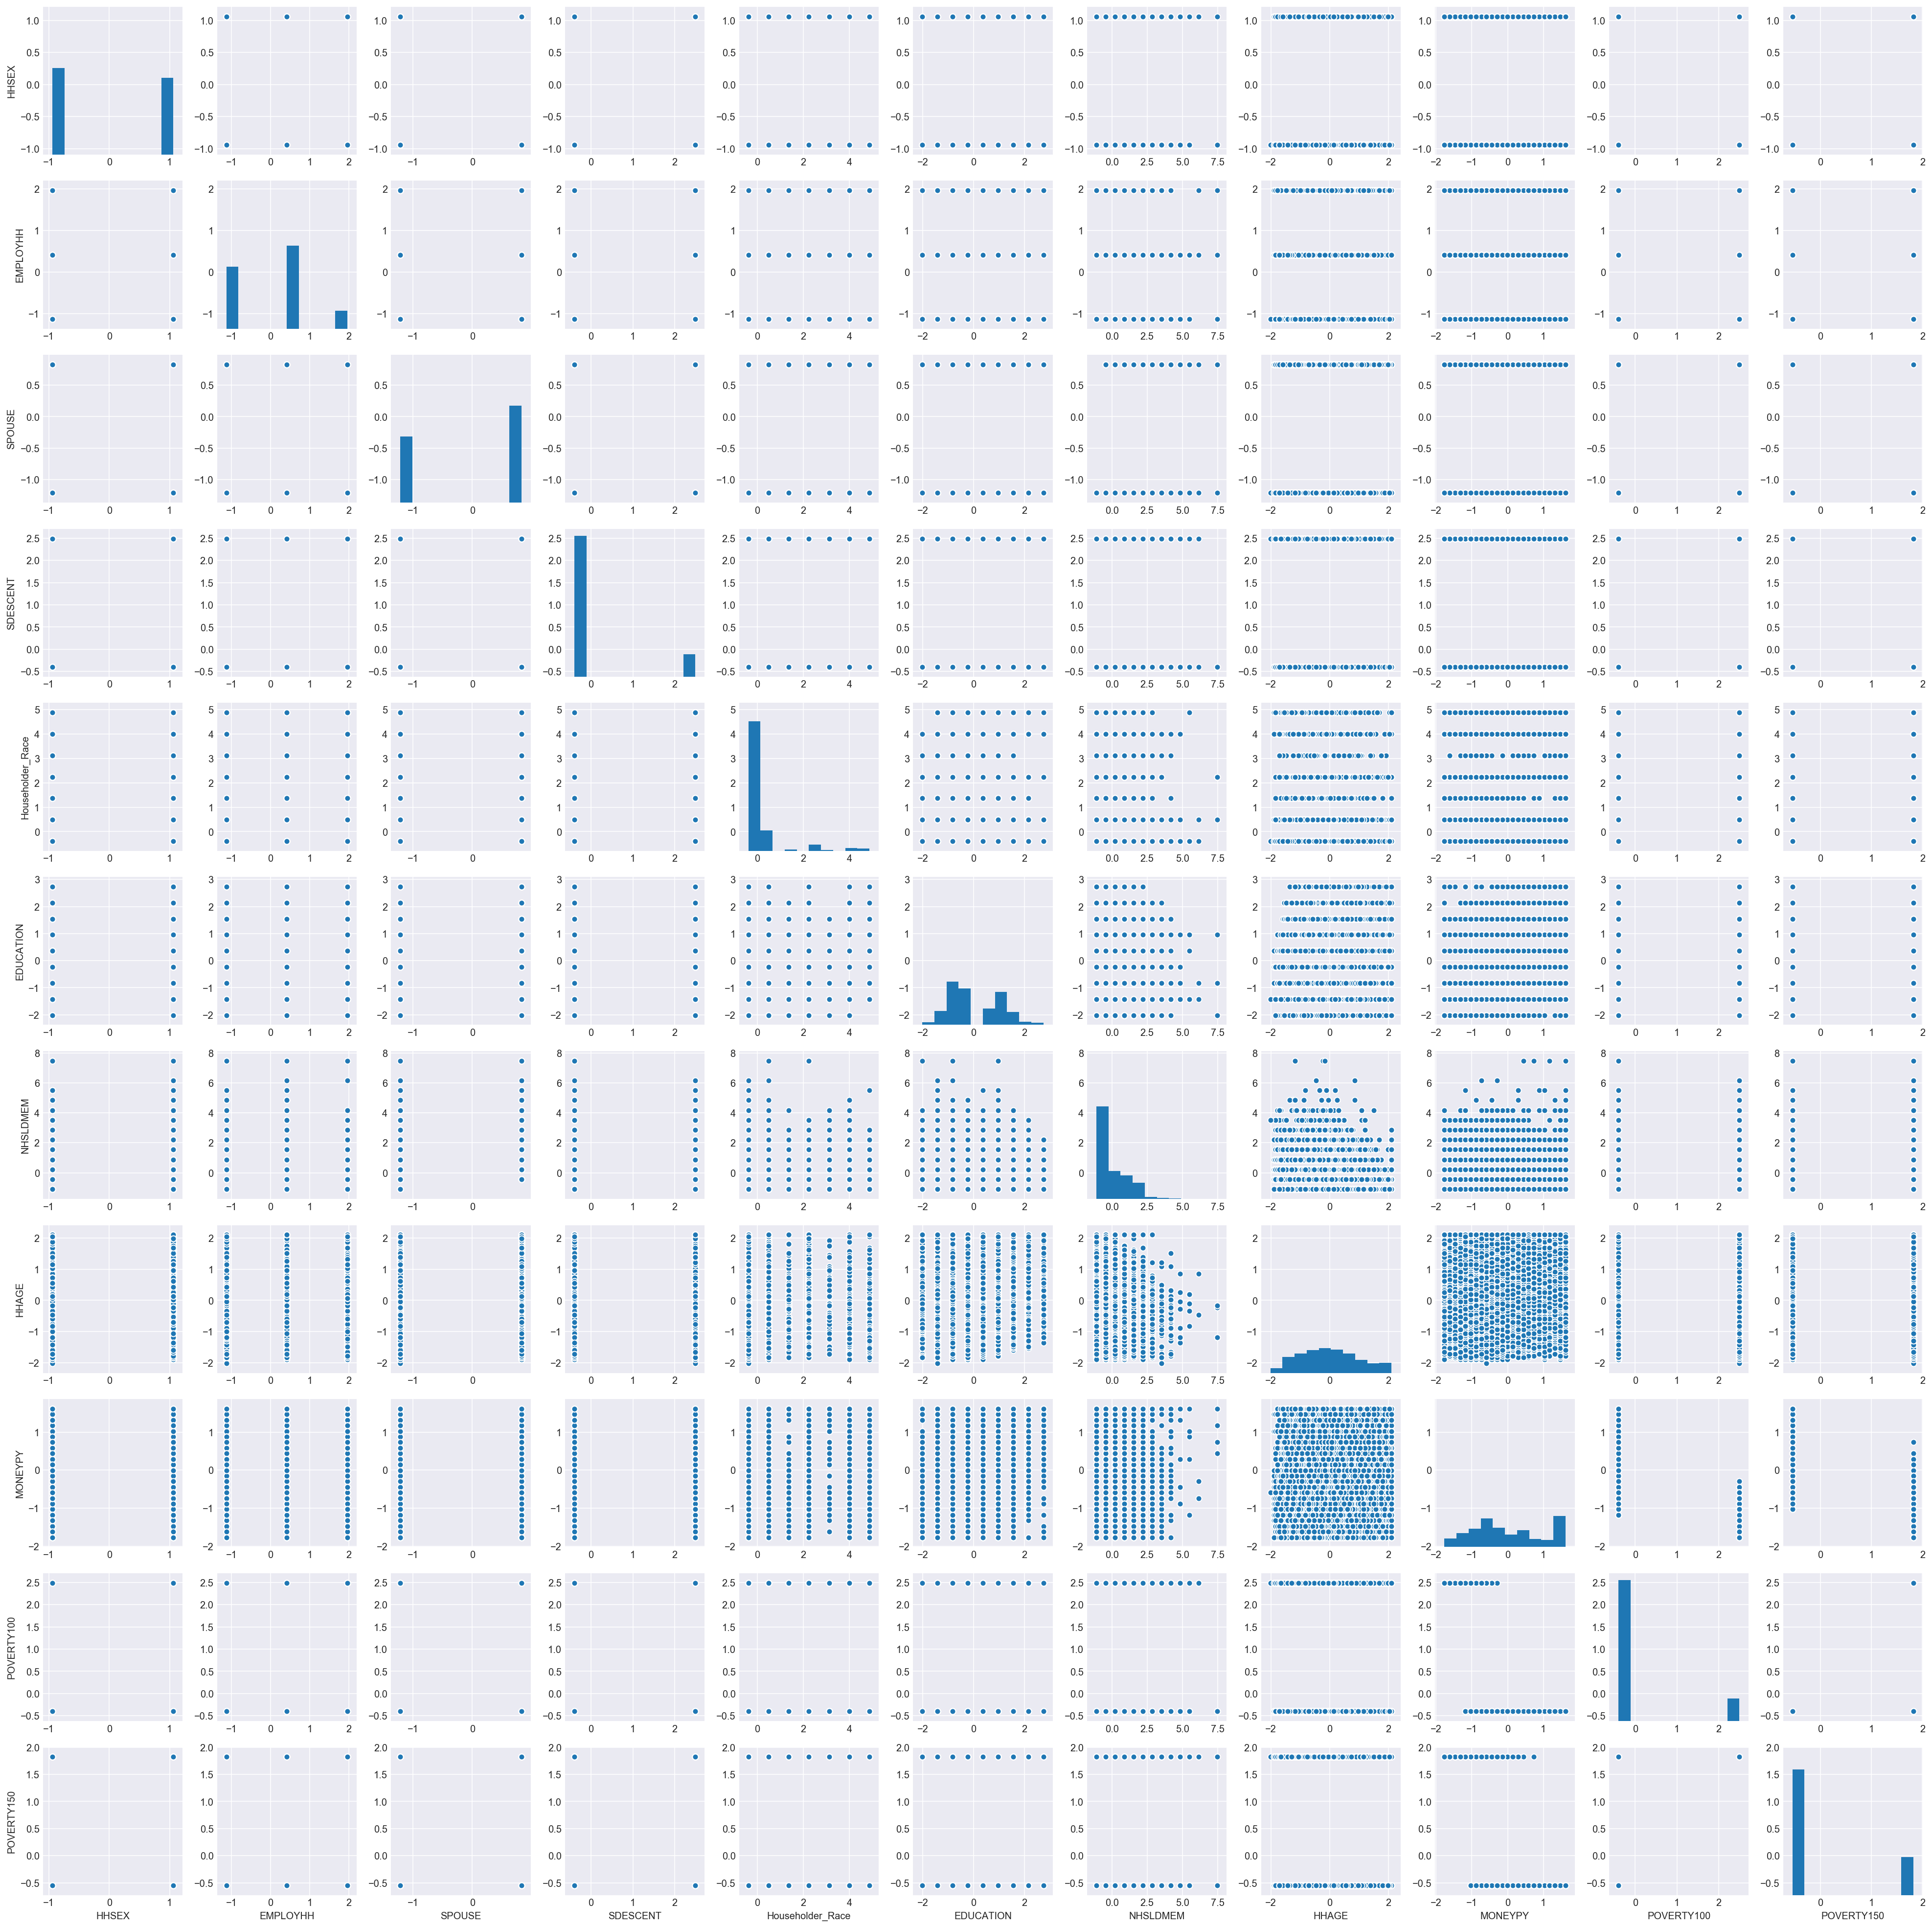

In [53]:
sns.pairplot(demographic_stand)

In [213]:
'''   Find the number of respondents by race
1\n2\n3\n4\n5\n6\n7
      White Alone\nBlack or African/American Alone\nAmerican Indian or Alaska Native Alone\nAsian Alone\
      nNative Hawaiian or Other Pacific Islander Alone\nSome Other Race Alone\n2 or More Races Selected
'''

race = RECS[['HHSEX','Householder_Race']].groupby(['Householder_Race']).sum().reset_index().sort_values(['HHSEX'],\
                                ascending=False)
race

,Householder_Race,HHSEX
0,1,14175
1,2,2108
3,4,710
5,6,307
6,7,241
2,3,164
4,5,60


[Text(0,0,u'White'),
 Text(0,0,u'Black or African/American'),
 Text(0,0,u'Asian'),
 Text(0,0,u'Some Other Race'),
 Text(0,0,u'2 or More Races'),
 Text(0,0,u'American Indian or Alaska Native'),
 Text(0,0,u'Native Hawaiian or Other Pacific Islander')]

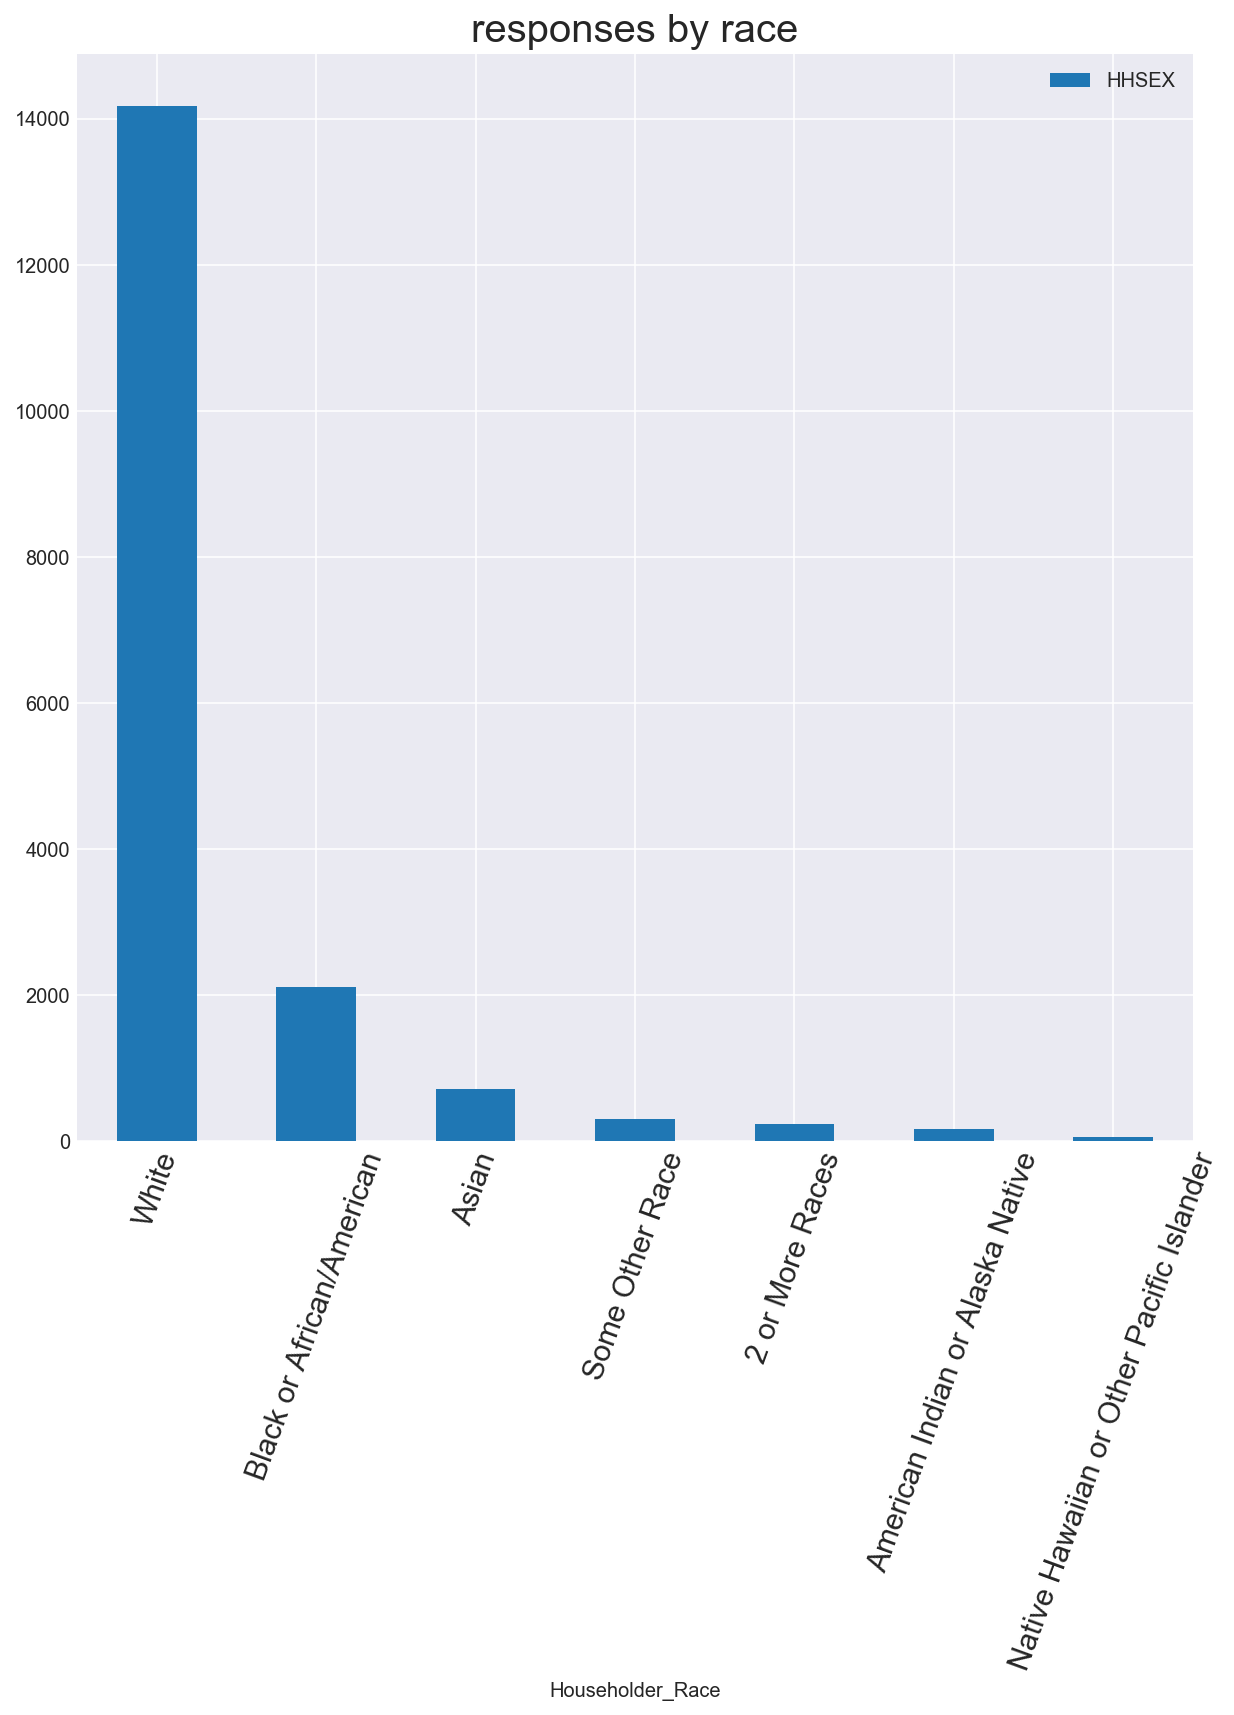

In [248]:
#plot the number of respondents by race
fig, ax = plt.subplots(figsize=(10,10))
race.plot(kind='bar', x='Householder_Race', y='HHSEX', ax=ax)
ax.set_title('responses by race', fontsize=20)
x_labels = ['White', 'Black or African/American', 'Asian', 'Some Other Race','2 or More Races',
          'American Indian or Alaska Native','Native Hawaiian or Other Pacific Islander']
ax.set_xticklabels(x_labels, rotation=70,fontsize=15)


Text(0,0.5,u'frequency')

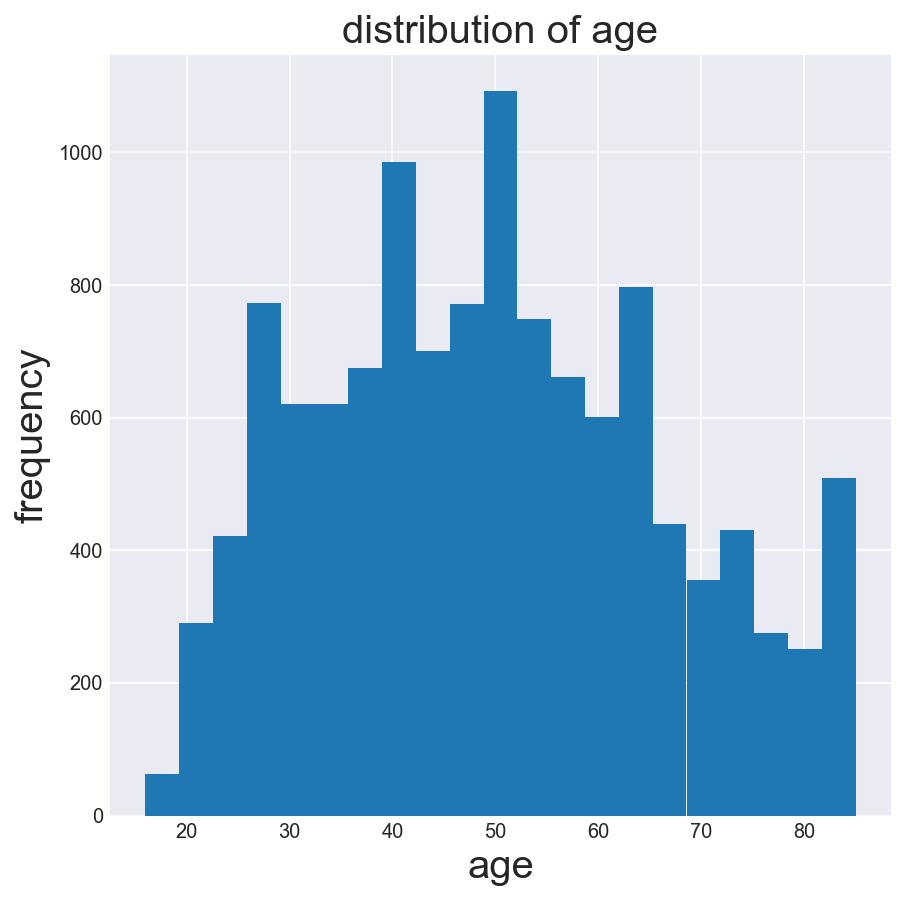

In [272]:
fig, ax = plt.subplots(figsize=(7,7))

RECS['HHAGE'].plot(kind='hist', bins=21, ax=ax)
ax.set_title('distribution of age', fontsize=20)
ax.set_xlabel('age', fontsize=20)
ax.set_ylabel('frequency', fontsize=20)



2    3193
3    2701
5    2428
4    1193
1    1033
6    957 
7    221 
0    200 
8    157 
Name: EDUCATION, dtype: int64


[Text(0,0,u'No schooling completed'),
 Text(0,0,u'Kindergarten to grade 12'),
 Text(0,0,u'High school diploma or GED'),
 Text(0,0,u'Some college'),
 Text(0,0,u'Associates degree'),
 Text(0,0,u'Bachelors degree'),
 Text(0,0,u'Masters degree'),
 Text(0,0,u'Professional degree'),
 Text(0,0,u'Doctorate degree')]

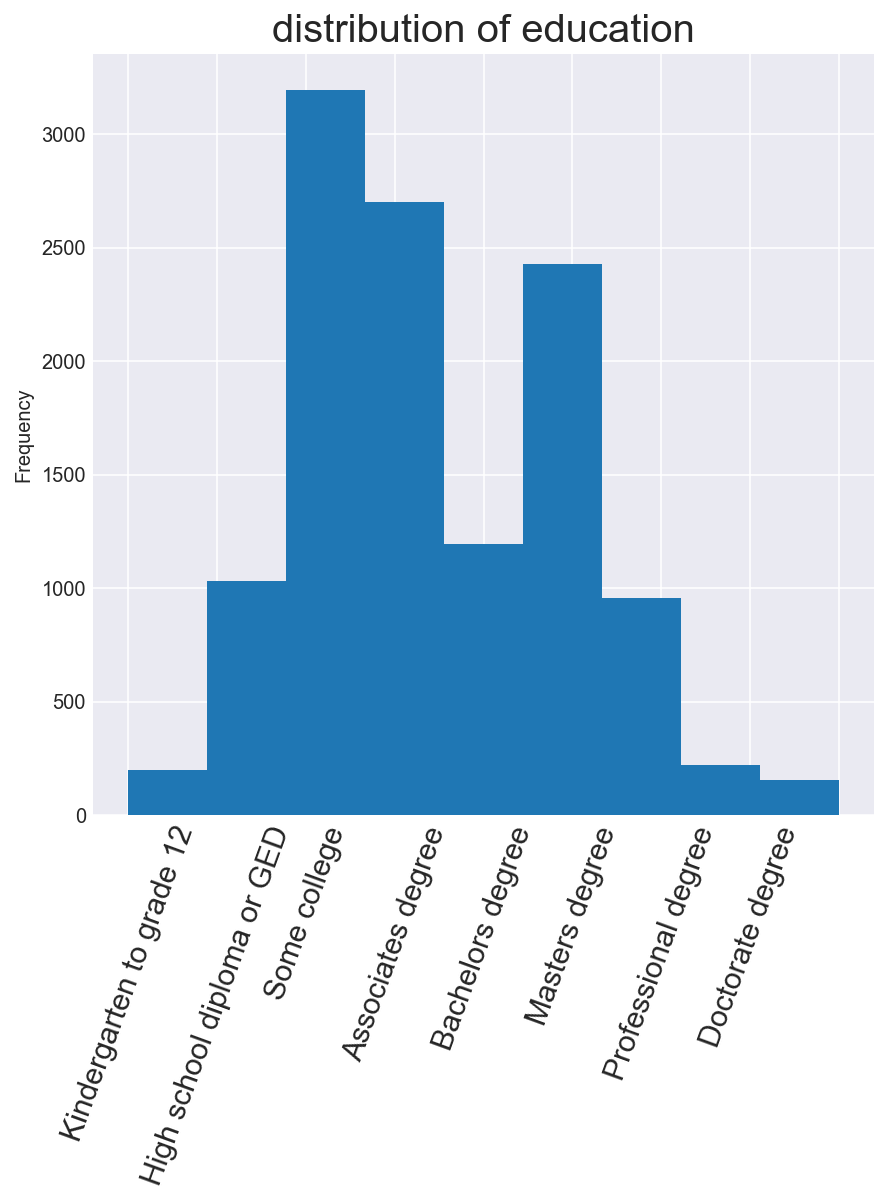

In [282]:
'''
0\n1\n2\n3\n4\n5\n6\n7\n8
No schooling completed\nKindergarten to grade 12\nHigh school diploma or GED\nSome college, 
no degree\nAssociate's degree\nBachelor's degree\nMaster's degree\nProfessional degree\nDoctorate degree

'''
print RECS['EDUCATION'].value_counts()

fig, ax = plt.subplots(figsize=(7,7))

RECS['EDUCATION'].plot(kind='hist',bins=9, ax=ax)
ax.set_title('distribution of education', fontsize=20)
x_labels = ['No schooling completed', 'Kindergarten to grade 12', 'High school diploma or GED', 'Some college',\
'Associates degree', 'Bachelors degree','Masters degree', 'Professional degree', 'Doctorate degree']
ax.set_xticklabels(x_labels, rotation=70,fontsize=15)


In [ ]:
fig, ax = plt.subplots(2,2,figsize=(10,10)) # 2,2 is for the number of plots. Start with this 
df.plot(x='Sale.Condition', y='Lot.Area', ax=ax[0][0]) # ax=ax 
df.plot(x='Sale.Condition', y='Lot.Frontage', ax=ax[1][1]) # the slicing is important
ax[0][1].scatter(df['Sale.Condition'], df['Lot.Area'])
ax[1][0].annotate('=)', xy=(.5, .5), xytext=(.3, .3),
            arrowprops=dict(facecolor='black', shrink=0.05),)

colors =['red','pink','blue']
students = ['jack','eddie','rebecca']
positions = [(0.5, 0.5), (0.75, 0.75), (0.5,0.1)]
for s, p, c in zip(students, positions, colors):
    ax[1][0].annotate(s,p, fontsize=20, color = c)

## Electricty data

In [54]:
'''
'KWHSPH', 'Electricity usage for space heating, in kilowatt-hours, 2009'],
'KWHCOL','Electricity usage for air-conditioning, central and window/wall (room), in kilowatt-hours, 2009'],
'KWHWTH','Electricity usage for water heating, in kilowatt-hours, 2009'],
'KWHRFG','Electricity usage for refrigerators, in kilowatt-hours, 2009'],
'KWHOTH','Electricity usage for other purposes (all end-uses except SPH, COL, WTH, and RFG), in kilowatt-hours, 2009'],
'BTUELSPH','Electricity usage for space heating, in thousand BTU, 2009'],
'BTUELCOL','Electricity usage for air-conditioning, central and window/wall (room), in thousand BTU, 2009'],
'BTUELWTH','Electricity usage for water heating, in thousand BTU, 2009'],
'BTUELRFG','Electricity usage for refrigerators, in thousand BTU, 2009'],
'BTUELOTH','Electricity usage for other purposes (all end-uses except SPH, COL, WTH, and RFG), in thousand BTU, 2009']]
'''

electricity = RECS[['KWHSPH','KWHCOL','KWHWTH','KWHRFG', 'KWHOTH','BTUELSPH','BTUELCOL',
                   'BTUELWTH',
                   'BTUELRFG',
                   'BTUELOTH']]


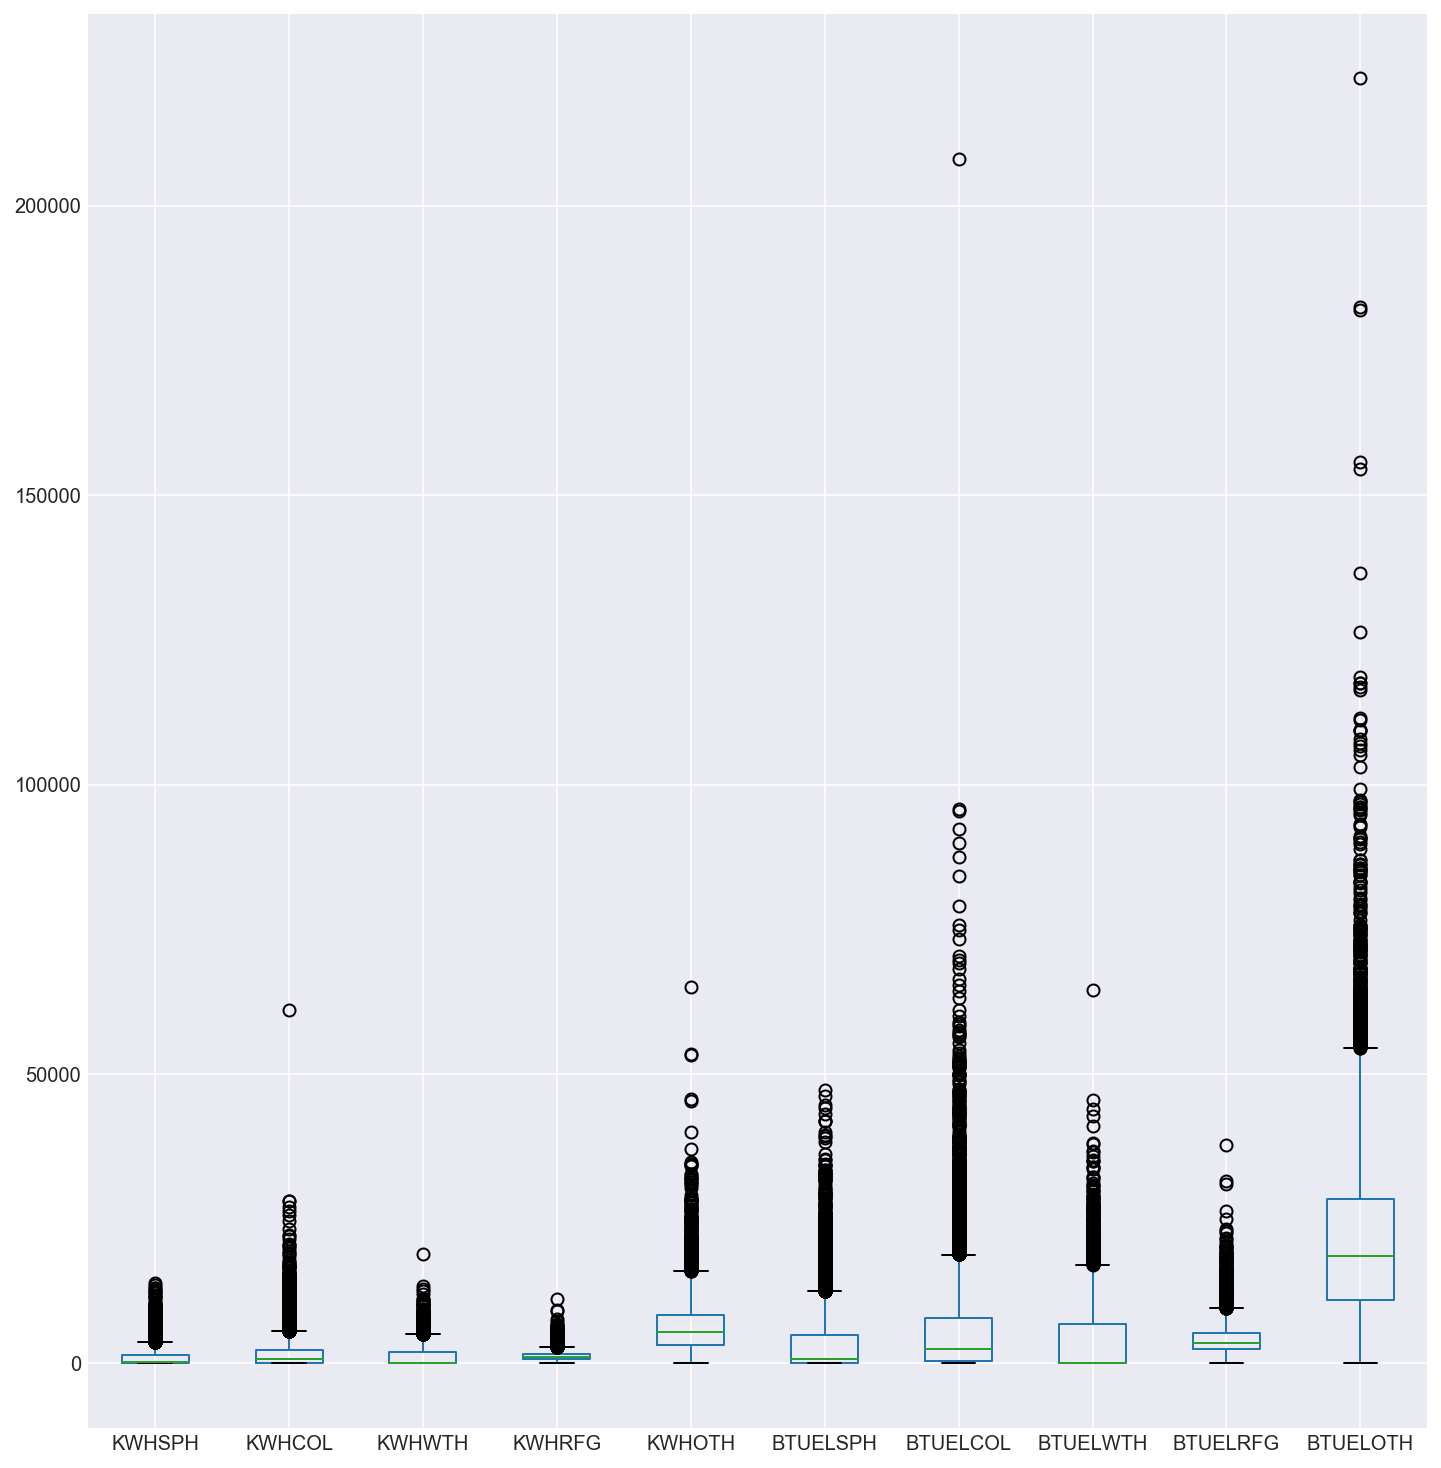

In [55]:
electricity.plot(kind='box', figsize =(12,13))

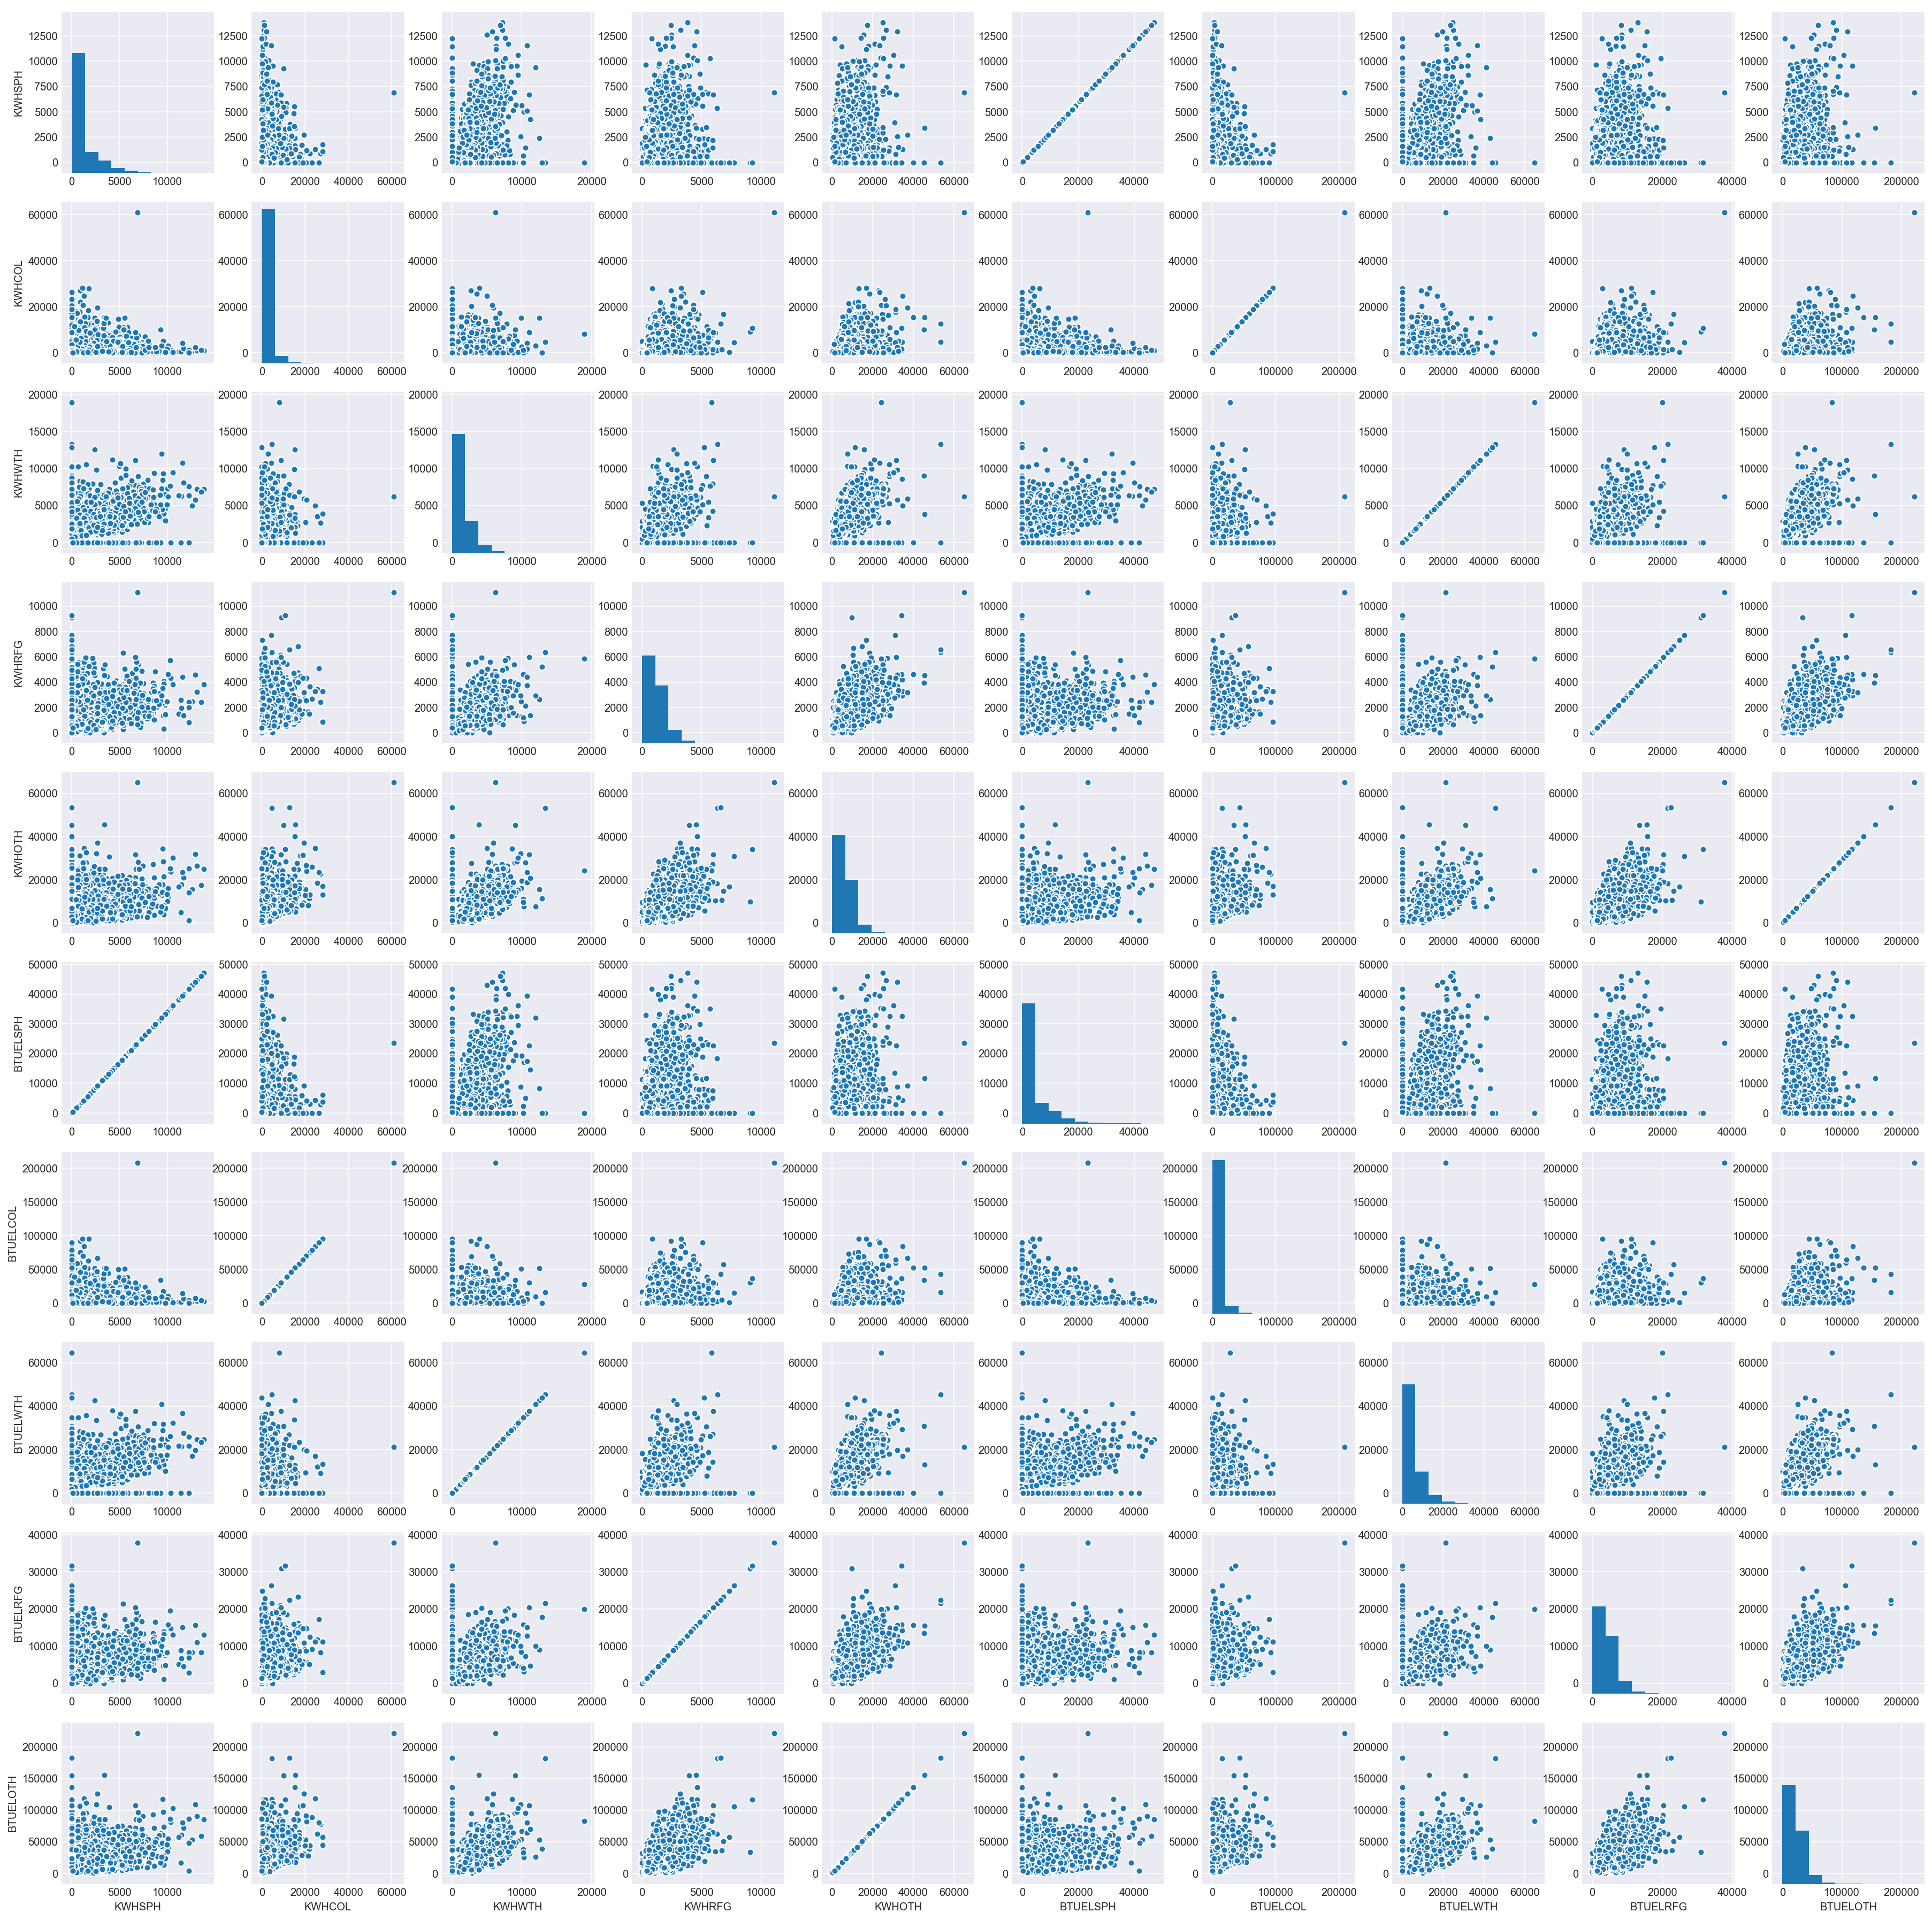

In [56]:
sns.pairplot(electricity)

## Space heating data

In [ ]:
'''
Main space heating
    ['EQUIPM', 'Type of main space heating equpiment used'],
       ['MAINTHT',
        'Routine service or maintenance performed on main space heating equipment'],
       ['EQUIPAGE', 'Age of main space heating equipment'],
       ['HELPHT',
        'Assistance for replacing or maintaining main space heating equipment'],
       ['HELPHTY', 'Year of assistance for main space heating equipment'],
       ['EQMAMT',
        'Portion of space heating provided by main space heating equipment (for homes with 
        main and secondary heating only)']
'''


In [57]:
main_space_heat = RECS[['EQUIPM','MAINTHT','EQUIPAGE','HELPHT','HELPHTY','EQMAMT']]

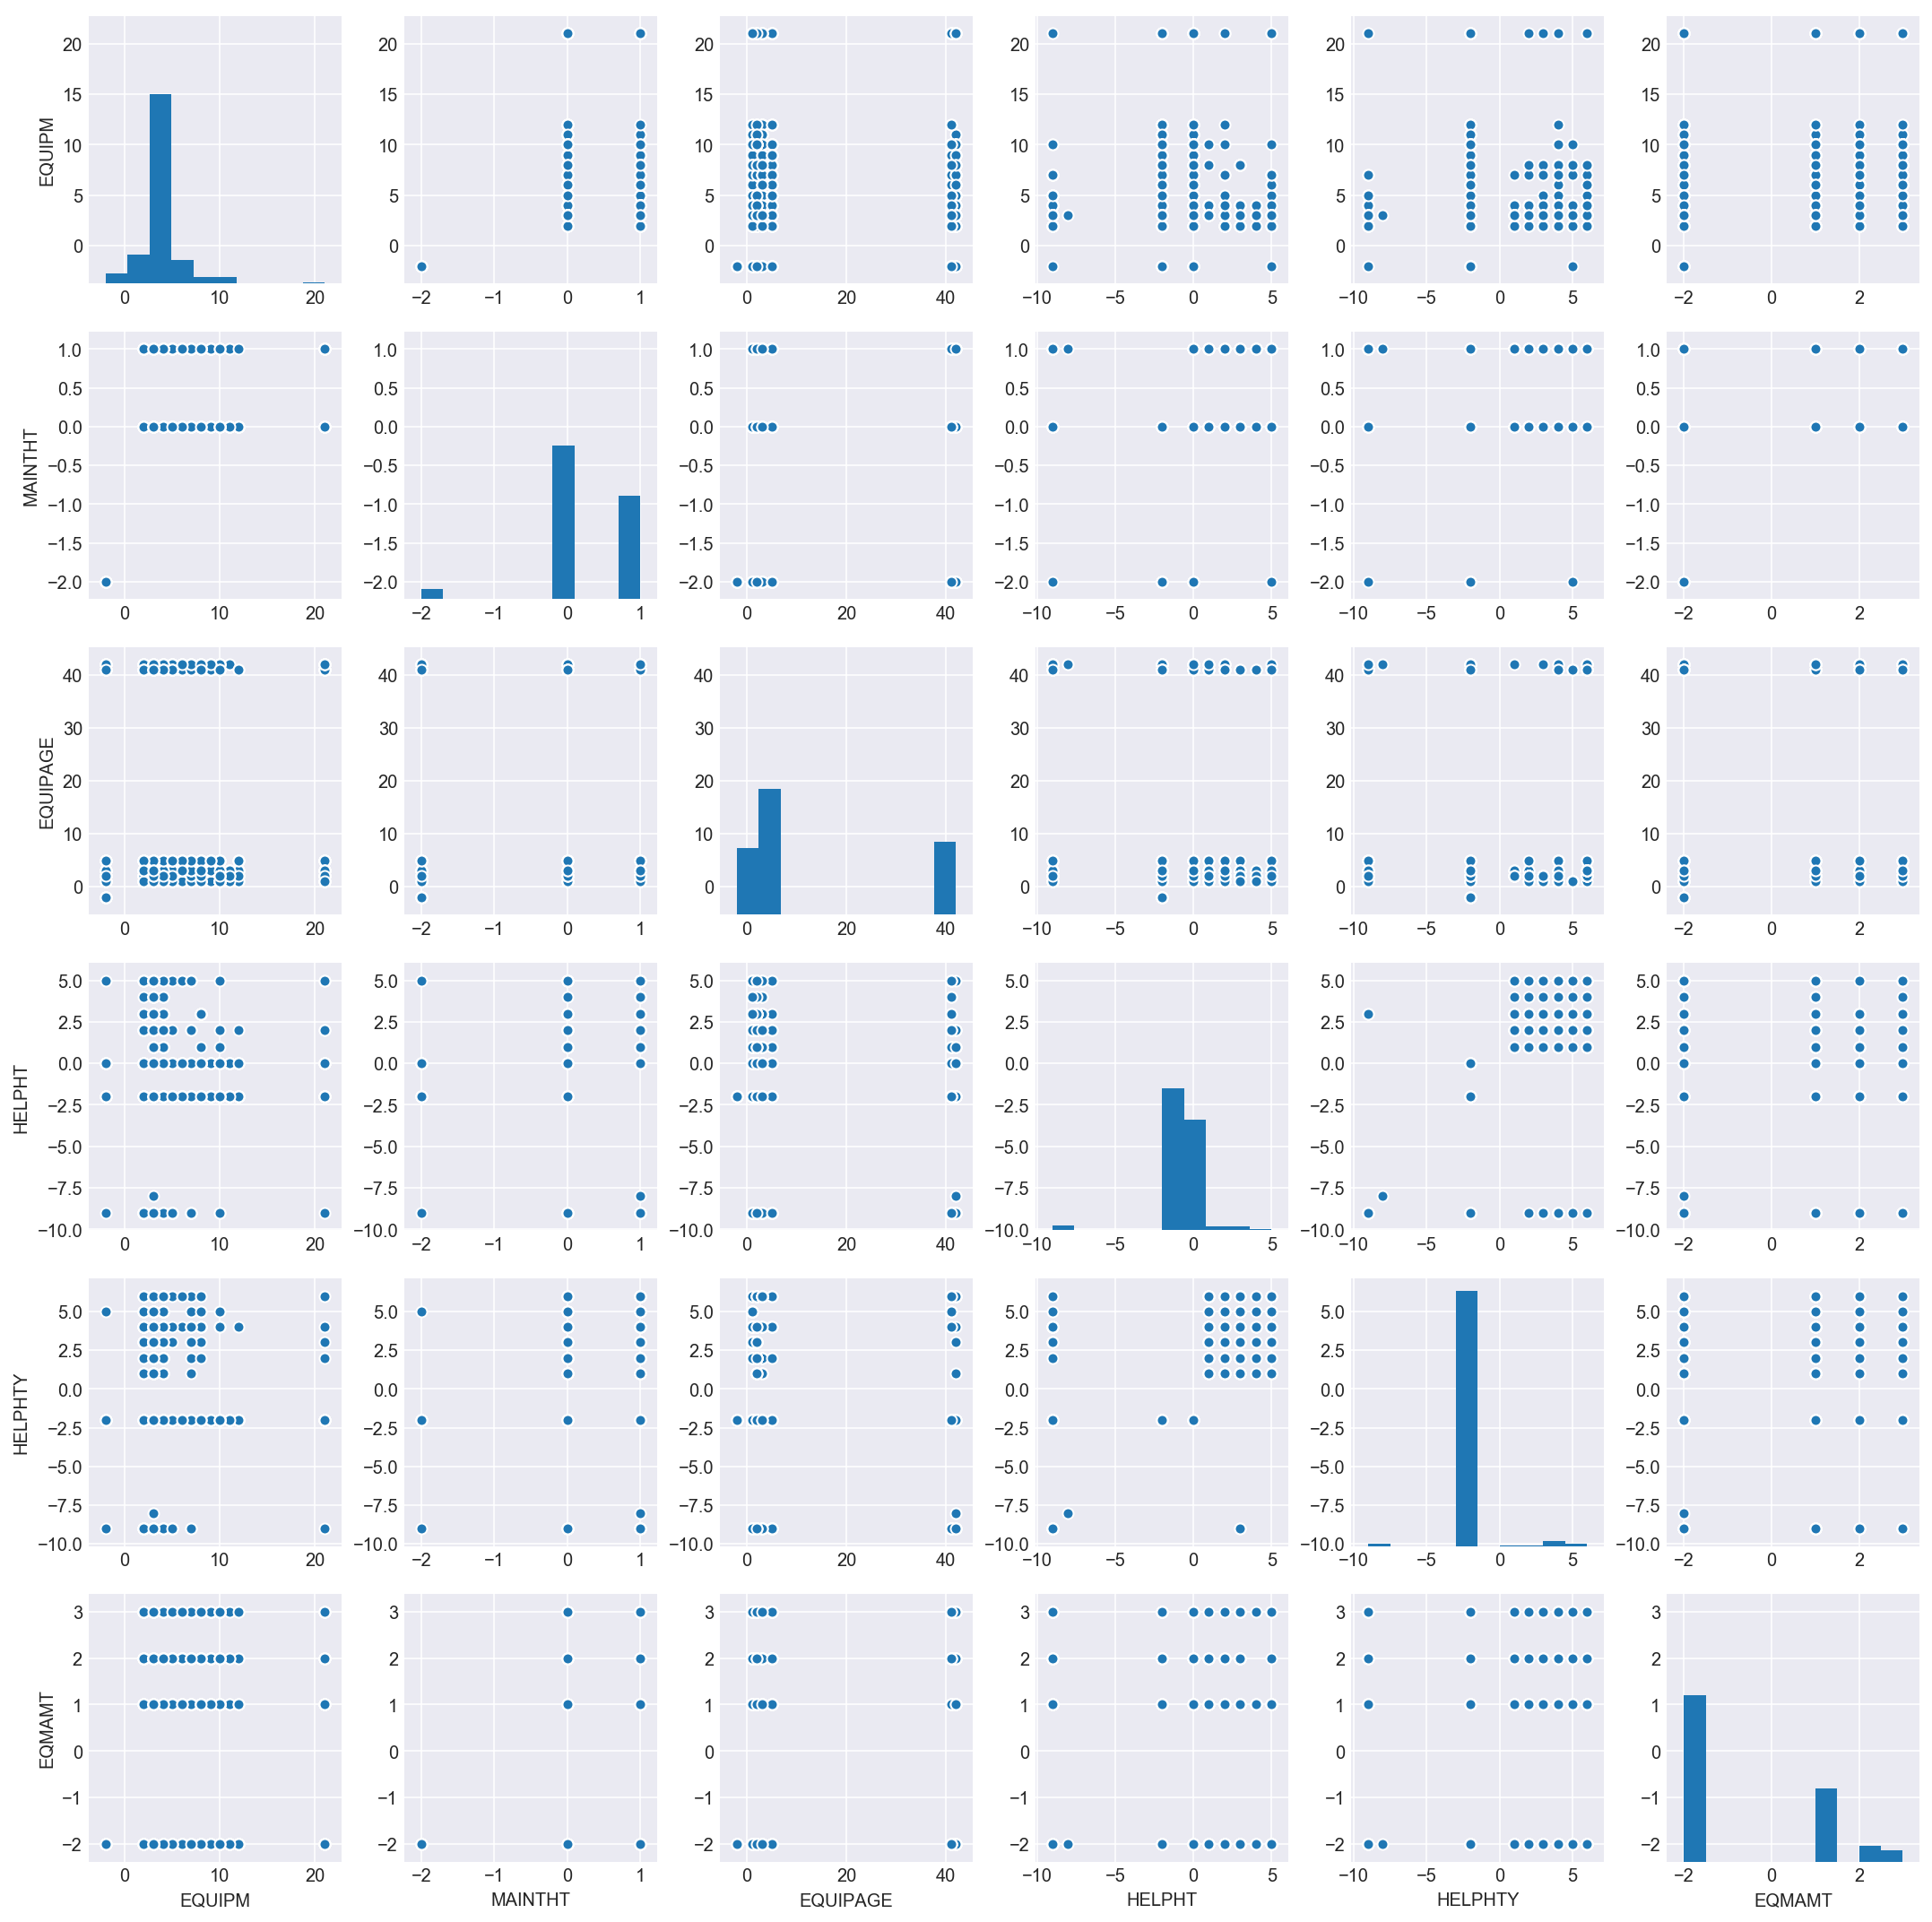

In [158]:
sns.pairplot(main_space_heat)

In [ ]:
#Help- can you think of a way to pull the indexes from the code book?

.split('/n')
(1,2){n,e}
for loop
dictionary

# engineer features

In [58]:
'''
Drop unwanted columns. Any column heading beginning with the letter 'Z' denotes an imputation flag. The actual 
imputation is recorded in a separate column, therefore remove all the imputation flag columns. 
''' 
unwanted = RECS.columns[RECS.columns.str.startswith('Z')]


In [307]:
RECS2 =RECS.drop(unwanted, axis=1, errors='ignore')

In [309]:
print RECS2.shape
RECS2.head()

(12083, 572)


,DOEID,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,...,SCALEEL,KAVALNG,PERIODNG,SCALENG,PERIODLP,SCALELP,PERIODFO,SCALEFO,PERIODKR,SCALEKER
0,1,2,4,12,2,2471.679705,4742,1080,4953,1271,...,0,-2,-2,-2,-2,-2,-2,-2,-2,-2
1,2,4,10,26,2,8599.172010,2662,199,2688,143,...,0,1,1,0,-2,-2,-2,-2,-2,-2
2,3,1,1,1,5,8969.915921,6233,505,5741,829,...,0,3,5,3,-2,-2,-2,-2,-2,-2
3,4,2,3,7,2,18003.639600,6034,672,5781,868,...,3,3,5,3,-2,-2,-2,-2,-2,-2
4,5,1,1,1,3,5999.605242,5388,702,5313,797,...,0,1,1,0,-2,-2,-2,-2,-2,-2


In [310]:
'''
In the RECS microdata document, we learn that a common code for “not-applicable” responses is (-2). Look at the amount 
of (-2.0) accross columns. Example of one column below.
'''
RECS2['NKRGALNC'].value_counts()[-2]

11986

In [311]:
# Count the number of (-2.0) entries accross all columns 
((RECS2 ==-2).sum()/len(RECS2)).sample(4)

KWHSPH     0.000000
DRYER      0.000000
HELPCW     0.737151
CHIMNEY    0.036911
dtype: float64

In [312]:
# Extract the columns that have larger than 90% of responses as "not applicable" or (-2.0)
# Examine the size and columns names
high_na = (RECS2 ==-2).sum()/len(RECS2)>.9

print (high_na[high_na]==True).shape
print_full (high_na[high_na]==True)

(96,)
CONDCOOP         True
CONVERSION       True
ORIG1FAM         True
LOOKLIKE         True
TYPEHUQ4         True
PCTBSTHT         True
BASECL2          True
PCTBSTCL         True
FINATTRMS        True
ATTCHT2          True
PCTATTHT         True
ATTCCL2          True
PCTATTCL         True
STGRILA          True
HELPFRIY         True
TYPERFR3         True
SIZRFRI3         True
REFRIGT3         True
MONRFRI3         True
AGERFRI3         True
ESFRIG3          True
REPLCFRZ         True
HELPFRZ          True
HELPFRZY         True
UPRTFRZR2        True
SIZFREEZ2        True
FREEZER2         True
AGEFRZR2         True
HELPDWY          True
HELPCWY          True
TVONWDWATCH3     True
TVONWEWATCH3     True
MONITOR3         True
PCSLEEP3         True
DNTHEAT          True
EQUIPNOHEAT      True
FUELNOHEAT       True
HELPHTY          True
FURNFUEL         True
RADFUEL          True
PIPEFUEL         True
RMHTFUEL         True
HSFUEL           True
NGFPFLUE         True
USENGFP          True
RNGF

In [242]:
high_na.index

Index([u'DOEID', u'REGIONC', u'DIVISION', u'REPORTABLE_DOMAIN', u'TYPEHUQ',
       u'NWEIGHT', u'HDD65', u'CDD65', u'HDD30YR', u'CDD30YR',
       ...
       u'SCALEEL', u'KAVALNG', u'PERIODNG', u'SCALENG', u'PERIODLP',
       u'SCALELP', u'PERIODFO', u'SCALEFO', u'PERIODKR', u'SCALEKER'],
      dtype='object', length=572)

In [313]:
# drop the column names found in high_na from RECS2
RECS_sub = RECS2.drop((high_na[high_na]==True).index, axis=1)

In [322]:
print RECS_sub.shape
RECS_sub

(12083, 476)


,DOEID,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,...,TOTALDOLCOL,TOTALDOLWTH,TOTALDOLRFG,TOTALDOLOTH,KAVALEL,PERIODEL,SCALEEL,KAVALNG,PERIODNG,SCALENG
0,1,2,4,12,2,2471.679705,4742,1080,4953,1271,...,219,211,108,550,1,1,0,-2,-2,-2
1,2,4,10,26,2,8599.172010,2662,199,2688,143,...,17,287,121,501,1,1,0,1,1,0
2,3,1,1,1,5,8969.915921,6233,505,5741,829,...,49,115,243,339,1,1,0,3,5,3
3,4,2,3,7,2,18003.639600,6034,672,5781,868,...,101,179,159,534,3,5,3,3,5,3
4,5,1,1,1,3,5999.605242,5388,702,5313,797,...,0,237,85,620,1,1,0,1,1,0
5,6,2,4,10,2,4232.486778,8866,270,8708,436,...,45,131,151,893,1,1,0,1,1,0
6,7,1,2,3,2,7862.341967,5213,749,5355,796,...,253,391,332,2077,1,1,0,1,1,0
7,8,3,5,17,2,6297.038285,1086,2647,1070,2554,...,701,518,85,1128,1,1,0,-2,-2,-2
8,9,1,2,5,3,12156.721510,4826,1027,5381,912,...,54,190,212,397,1,1,0,1,1,0
9,10,2,4,12,2,3242.224473,4687,1205,4755,1467,...,95,191,81,433,1,1,0,1,1,0


In [285]:
print_full (RECS_sub.columns.values)

['DOEID' 'REGIONC' 'DIVISION' 'REPORTABLE_DOMAIN' 'TYPEHUQ' 'NWEIGHT'
 'HDD65' 'CDD65' 'HDD30YR' 'CDD30YR' 'Climate_Region_Pub' 'AIA_Zone'
 'METROMICRO' 'UR' 'KOWNRENT' 'YEARMADE' 'YEARMADERANGE' 'OCCUPYYRANGE'
 'NUMFLRS' 'NUMAPTS' 'WALLTYPE' 'ROOFTYPE' 'STUDIO' 'NAPTFLRS' 'STORIES'
 'BEDROOMS' 'NCOMBATH' 'NHAFBATH' 'OTHROOMS' 'TOTROOMS' 'CELLAR' 'CRAWL'
 'CONCRETE' 'BASEFIN' 'FINBASERMS' 'BASEHEAT' 'BASEHT2' 'BASECOOL'
 'BASEUSE' 'ATTIC' 'ATTICFIN' 'ATTCHEAT' 'ATTCCOOL' 'ATTICUSE' 'PRKGPLC1'
 'SIZEOFGARAGE' 'GARGLOC' 'GARGHEAT' 'GARGCOOL' 'PRKGPLC2' 'SIZEOFDETACH'
 'OUTLET' 'STOVEN' 'STOVENFUEL' 'STOVE' 'STOVEFUEL' 'OVEN' 'OVENFUEL'
 'OVENUSE' 'OVENCLN' 'TYPECLN' 'MICRO' 'AMTMICRO' 'DEFROST' 'OUTGRILL'
 'OUTGRILLFUEL' 'TOPGRILL' 'TOASTER' 'NUMMEAL' 'FUELFOOD' 'COFFEE'
 'NUMFRIG' 'TYPERFR1' 'SIZRFRI1' 'REFRIGT1' 'ICE' 'AGERFRI1' 'ESFRIG'
 'REPLCFRI' 'HELPFRI' 'TYPERFR2' 'SIZRFRI2' 'REFRIGT2' 'MONRFRI2'
 'AGERFRI2' 'ESFRIG2' 'SEPFREEZ' 'NUMFREEZ' 'UPRTFRZR' 'SIZFREEZ' 'FREEZER'
 'AGEFRZ

In [326]:
# dummy urban to 0 and rural to 1
RECS_sub['URBAN'] = pd.get_dummies(RECS_sub['UR']).iloc[:,:1]
RECS_sub['RURAL'] = RECS_sub['URBAN']

In [332]:
RECS_sub.drop('URBAN', axis=1, inplace=True, errors='ignore')

In [331]:
# 0 is urban and 1 is rural
RECS_sub['RURAL'].value_counts()

0    9656
1    2427
Name: RURAL, dtype: int64

In [350]:
RECS_sub['METROMICRO'].value_counts()


METRO    10302
MICRO    1109 
NONE     672  
Name: METROMICRO, dtype: int64

In [352]:
# dummy RECS_sub['METROMICRO'], but just keep it around for now since we're not going to model with it.

metromicro= pd.get_dummies(RECS_sub['METROMICRO']).iloc[:,:2]
print metromicro.shape
metromicro.head()


(12083, 2)


,METRO,MICRO
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


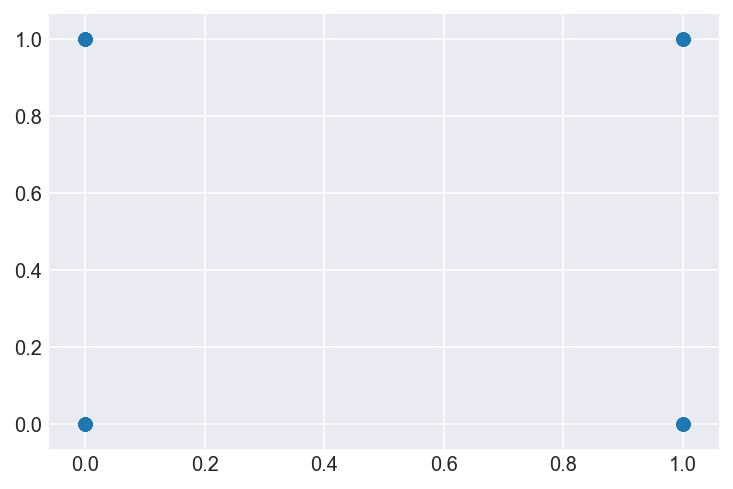

In [360]:
plt.scatter(x=RECS_sub["RURAL"], y=metromicro["MICRO"]) 

# model 

In [422]:
# pre-process and performance imports
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, roc_curve
from sklearn.decomposition import PCA

In [394]:
# Modeling imports 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR

### Create a default model that includes everything

In [396]:
# drop METROMICRO from data set since it's still an object at this point
full_model = RECS_sub.drop(['METROMICRO','UR'], axis=1)

In [397]:
# try to use everything in this first model. Set up X
X = full_model.drop('HHAGE', axis=1)

In [392]:
# set up target variable as respondents whose age is between 20 and 40 (inclusive.)

print "number of early adulthood respondents:", y.sum(), 'length of dataframe: ', len(y)
y = pd.Series(np.where(np.logical_and(RECS['HHAGE']>=20, RECS['HHAGE']<=40),1,0))

number of early adulthood respondents: 3920 length of dataframe:  12083


In [398]:
# standardize features

ss = StandardScaler()
Xs = ss.fit_transform(X)

In [429]:
pca = PCA().fit(Xs)

In [428]:
pca.explained_variance_ratio_

AttributeError: 'numpy.ndarray' object has no attribute 'explained_variance_ratio_'

In [420]:
# hold out 20% to test
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.20, random_state=42)

In [402]:
# get baseline model. Our model will have to perform better than 67.56% 
max(np.mean(y), 1-np.mean(y))

0.6755772573036498

In [421]:
# Do a quick search over a variety of classification models
models = []
models.append(('LOR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RFRST', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('ADA', AdaBoostClassifier()))
models.append(('SVM', SVC()))
models.append(('LSVM', LinearSVC()))
#models.append(('')


# Evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold()
    cv_results = cross_val_score(model, Xs_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LOR: 0.813056 (0.006047)
KNN: 0.699048 (0.000959)
CART: 0.793089 (0.002155)
RFRST: 0.784916 (0.005237)
GB: 0.857852 (0.005894)
ADA: 0.839230 (0.005756)
SVM: 0.805090 (0.001105)
LSVM: 0.806538 (0.002409)


In [ ]:
# in my model -  control for region, home ownership, control for income, 

#randomforest - predicts millenial